In [1]:
!pip install pennylane pennylane-sf pennylane-qiskit pennylane-cirq pennylane-forest pennylane-qsharp

In [0]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, AdagradOptimizer

In [0]:
# vamos a usar el simulador de fotonica
dev = qml.device("default.gaussian", wires=1)

In [0]:
@qml.qnode(dev)
def circuit(var, x=None):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # Matrix multiplication of input layer
    qml.Rotation(var[0][0], wires=0)
    qml.Squeezing(var[0][1], 0.0, wires=0)
    qml.Rotation(var[0][2], wires=0)

    # Bias
    qml.Displacement(var[0][3], 0.0, wires=0)

    return qml.expval(qml.X(0))

In [0]:
# loss function
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [0]:
# cost function
def cost(var, features, labels):
    preds = [circuit(var, x=x) for x in features]
    return square_loss(labels, preds)

In [0]:
# meto array y quiero que mi circuito aprenda la matriz que multiplicado por X da Y
X = np.array([0, 3])
Y = np.array([1, 3])

In [8]:
# var sera la matriz de weights que debera aprender el circuito; la inicializamos con pesos aleatorios
np.random.seed(0)
num_layers = 1
var_init = 0.05 * np.random.randn(num_layers, 4)
print(var_init)

[[0.08820262 0.02000786 0.0489369  0.11204466]]


In [9]:
# usamos el optimizados Adam
opt_GDO = qml.GradientDescentOptimizer(0.01)
opt_ADAM = AdamOptimizer(0.01)
opt_ADAGRAD = AdagradOptimizer(0.01)

var_GDO = var_init
var_ADAM = var_init
var_ADAGRAD = var_init

optimizers = [opt_GDO, opt_ADAM, opt_ADAGRAD]
vars = [var_GDO, var_ADAM, var_ADAGRAD]
name = ['Gradient Descent', 'ADAM', 'ADAGRAD']
cost_func = np.zeros((1000, 3))
# ahora iteramos sobre los tres optimizadores
i = 0
while i < 3:
  opt = optimizers[i]
  for it in range(1000):
      vars[i] = opt.step(lambda v: cost(v, X, Y), vars[i])
      cost_func[it][i] = cost(vars[i], X, Y)
      print("Iter: {:5d} | Cost: {:0.7f} | {}".format(it + 1, cost(vars[i], X, Y), name[i]))
  i += 1

Iter:     1 | Cost: 2.2641794 | Gradient Descent
Iter:     2 | Cost: 1.3816823 | Gradient Descent
Iter:     3 | Cost: 0.9657704 | Gradient Descent
Iter:     4 | Cost: 0.7389330 | Gradient Descent
Iter:     5 | Cost: 0.6042955 | Gradient Descent
Iter:     6 | Cost: 0.5188271 | Gradient Descent
Iter:     7 | Cost: 0.4605870 | Gradient Descent
Iter:     8 | Cost: 0.4176487 | Gradient Descent
Iter:     9 | Cost: 0.3834598 | Gradient Descent
Iter:    10 | Cost: 0.3544834 | Gradient Descent
Iter:    11 | Cost: 0.3288550 | Gradient Descent
Iter:    12 | Cost: 0.3056042 | Gradient Descent
Iter:    13 | Cost: 0.2842178 | Gradient Descent
Iter:    14 | Cost: 0.2644093 | Gradient Descent
Iter:    15 | Cost: 0.2460013 | Gradient Descent
Iter:    16 | Cost: 0.2288694 | Gradient Descent
Iter:    17 | Cost: 0.2129154 | Gradient Descent
Iter:    18 | Cost: 0.1980557 | Gradient Descent
Iter:    19 | Cost: 0.1842153 | Gradient Descent
Iter:    20 | Cost: 0.1713253 | Gradient Descent
Iter:    21 | Cost: 

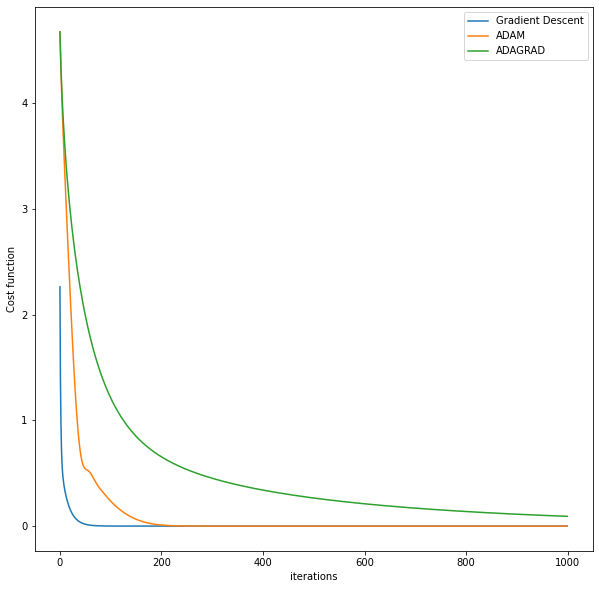

In [10]:
# aca graficamos la evolucion de los optimizadores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(cost_func[:,0])
plt.plot(cost_func[:,1])
plt.plot(cost_func[:,2])

plt.xlabel('iterations')
plt.ylabel('Cost function')
plt.legend(['Gradient Descent', 'ADAM', 'ADAGRAD'])
plt.show()

In [0]:
x_pred = [0, 3]
predictions = []
predictions.append([circuit(vars[0], x = x_) for x_ in x_pred])
predictions.append([circuit(vars[1], x = x_) for x_ in x_pred])
predictions.append([circuit(vars[2], x = x_) for x_ in x_pred])

In [12]:
print('Usando Gradient Descent.', 'Predicciones:',predictions[0], '; M:', vars[0])
print('Usando ADAM.', 'Predicciones:', predictions[1], '; M:', vars[1])
print('Usando ADAGRAD.', 'Predicciones:', predictions[2], '; M:', vars[2])

Usando Gradient Descent. Predicciones: [0.9999999999999982, 3.0000000000000004] ; M: [[0.31384668 0.60947906 0.28966415 0.5       ]]
Usando ADAM. Predicciones: [1.0, 3.0000000000000036] ; M: [[0.51430911 0.22651762 0.47708038 0.5       ]]
Usando ADAGRAD. Predicciones: [0.57293390854287, 3.0468863232380112] ; M: [[0.44656587 0.26454864 0.40785238 0.28646695]]
